Import libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore

In [5]:
class Polynomial:

    #Calculatin of parameters A for trajectory y
    def __init__(self, x0, dx0, ddx0, x1, dx1, ddx1, t, dt):

        x0 = np.asarray(x0)
        dx0 = np.asarray(dx0)
        ddx0 = np.asarray(ddx0)
        x1 = np.asarray(x1)
        dx1 = np.asarray(dx1)
        ddx1 = np.asarray(ddx1)
        self.dt = dt
        self.t = t
        self.trajectory = []
        self.time_split = np.linspace(0, self.t, int(self.t / self.dt))

        #Polynom parameter A
        a0 = np.asarray(x0)
        a1 = np.asarray(dx0)
        a2 = np.asarray(np.divide(ddx0, 2))
        a3 = (20 * x1 - 20 * x0 - (8 * dx1 + 12 * dx0) * t - (3 * ddx0 -ddx1) * t ** 2) / (2 * t ** 3)
        a4 = (30 * x0 - 30 * x1 + (14 * dx1 + 16 * dx0) * t + (3 * ddx0- 2 * ddx1) * t ** 2) / (2 * t ** 4)
        a5 = (12 * x1 - 12 * x0 - (6 * dx1 + 6 * dx0) * t - (ddx0 -ddx1) * t ** 2) / (2 * t ** 5)


        self.a = [a5, a4, a3, a2, a1, a0]


    def trajectory_at_time(self, t):
        a5 = np.asarray(self.a[0])
        a4 = np.asarray(self.a[1])
        a3 = np.asarray(self.a[2])
        a2 = np.asarray(self.a[3])
        a1 = np.asarray(self.a[4])
        a0 = np.asarray(self.a[5])

        y = a5 * t ** 5 + a4 * t ** 4 + a3 * t ** 3 + a2 * t ** 2 + a1 * t + a0
        #dy = a1 + 2 * a2 * t + 3 * a3 * t ** 2 + 4 * a4 * t ** 3 + 5 * a5 * t ** 4
        #ddy = 2 * a2 + 6 * a3 * t + 12 * a4 * t ** 2 + 20 * a5 * t **3 
        return y
    

    def whole_trajectory_calculate(self):

        self.trajectory = [0] * len(self.time_split)

        j = 0
        for i in self.time_split:
            self.trajectory[j] = self.trajectory_at_time(i)
        j += 1

        return 0
    
    def velocity_calculate(self):
        self.velocity = [np.array([np.nan, np.nan])]  # Initialize as an empty list

        j = 0
        for i in self.time_split:
            if j > 0:
                self.velocity.append((self.trajectory[j] - self.trajectory[j-1]) / self.dt)
            j += 1

        return 0
    

    def acceleration_calculate(self):
        self.acceleration = [np.array([np.nan, np.nan])]

        j = 0
        for i in enumerate(self.time_split):
            if j > 0:
                self.acceleration.append((self.velocity[j]- self.velocity[j-1]) / self.dt)
            j += 1

        return 0
    

    def jerk_calculate(self):
        self.jerk = [np.array([np.nan, np.nan])]

        j = 0
        for i in enumerate(self.time_split):
            if j > 0:
                self.jerk.append((self.acceleration[j]- self.acceleration[j-1]) / self.dt)
            j += 1

        return 0

||0||  Pose: [10. 10.]|Vel : [nan nan] m/s |  Acc: [nan nan] |  Jerk: [nan nan]
||1||  Pose: 0|Vel : [-1000. -1000.] m/s |  Acc: [nan nan] |  Jerk: [nan nan]
||2||  Pose: 0|Vel : 0.0 m/s |  Acc: [100000. 100000.] |  Jerk: [nan nan]
||3||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: [-10000000. -10000000.]
||4||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||5||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||6||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||7||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||8||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||9||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||10||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||11||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||12||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||13||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||14||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||15||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.0 |  Jerk: 0.0
||16||  Pose: 0|Vel : 0.0 m/s |  Acc: 0.

TypeError: 'int' object is not subscriptable

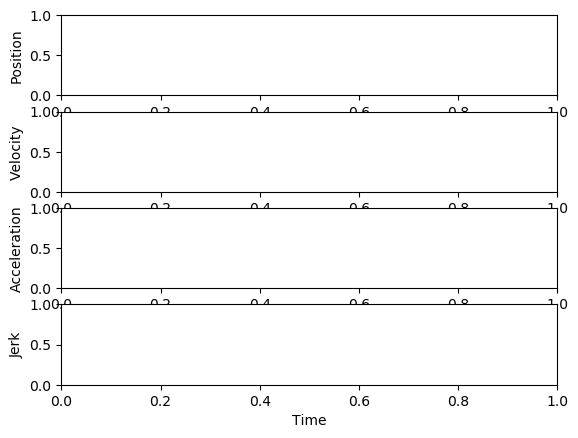

In [7]:
if __name__ == "__main__":

    test_trajectory = Polynomial([0, 0], [0, 0], [0, 0], [10, 10], [0, 0], [0, 0], 0.5, 0.01)

    # Create two subplots
    fig, (traj_plot, vel_plot, acc_plot, jerk_plot) = plt.subplots(4, 1)
    traj_plot.set_ylabel('Position')
    vel_plot.set_ylabel('Velocity')
    #vel_plot.set_xlabel('Time')
    acc_plot.set_ylabel('Acceleration')
    #acc_plot.set_xlabel('Time')
    jerk_plot.set_ylabel('Jerk')
    jerk_plot.set_xlabel('Time')
    time = np.linspace(0, test_trajectory.t, int(test_trajectory.t / test_trajectory.dt))

    test_trajectory.whole_trajectory_calculate()
    test_trajectory.velocity_calculate()
    test_trajectory.acceleration_calculate()
    test_trajectory.jerk_calculate()

    for index, i in enumerate(time):
        #prints velocity and acceleration
        print(f"{Fore.BLUE}||{index}|| {Fore.LIGHTBLACK_EX} Pose: {test_trajectory.trajectory[index]}|{Fore.GREEN}Vel : {test_trajectory.velocity[index]} m/s | {Fore.RED} Acc: {test_trajectory.acceleration[index]} | {Fore.CYAN} Jerk: {test_trajectory.jerk[index]}")

    #Trajectory plot
    aux_traj = []
    for i in test_trajectory.trajectory:
        #traj_plot.scatter(test_trajectory.time_split,i[1])
        aux_traj.append(i[0])

    traj_plot.scatter(test_trajectory.time_split, aux_traj)

    #Velocity plot
    aux_vel = []
    for j in test_trajectory.velocity:
        #vel_plot.scatter(j[0], j[1])
        aux_vel.append(j[0])

    vel_plot.scatter(test_trajectory.time_split[:], aux_vel)

    #Acceleration plot
    aux_acc = []
    for z in test_trajectory.acceleration:
        #acc_plot.scatter(z[0], z[1])
        aux_acc.append(z[0])
    
    acc_plot.scatter(test_trajectory.time_split, aux_acc)

    #Jerk plot
    aux_jerk = []
    
    for k in test_trajectory.jerk:
        #acc_plot.scatter(z[0], z[1])

        aux_jerk.append(k[0])

    #print((len(aux_jerk), len(test_trajectory.time_split)))

    jerk_plot.scatter(test_trajectory.time_split, aux_jerk)
    
    plt.show()